In [13]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

Authors: Noor Wahle, Jiachen Li, Shih-hung Chiu, Jingya Zhao

# Exploring the Effects of COVID-19 on Bart Commuter Ridership of Stations with Different Land Use

## Introduction

The COVID-19 pandemic and the subsequent work-from-home policy have resulted in substantial changes to travel patterns. This study seeks to analyze the differences in ridership patterns before and after the pandemic, shedding light on the shifts in travel behavior during this transformative period. By comparing pre-pandemic data with post-pandemic data, we can gain insights into how travel patterns have been impacted and understand the evolving dynamics of commuter behavior. This investigation will contribute to our understanding of the long-term effects of the pandemic on transportation systems and inform future planning and policy decisions.

The main goal of this study is to investigate the affect of the pandemic (COVID-19) on the BART ridership. We first utilize interactive maps to visualize the declination of the ridership of the selected stations. Then, standard deviation analysis is applied to understand the fluctuation of ridership of the stations. Based on the standard deviation result, we further cluster the stations into several land use categories. Next, we dive into understanding the traveling pattern of those selected stations with different land use category. Finally, a machine learning model is adopted to predict the post-pandemic ridership result using the pre-pandemic data.

[Data Source](https://www.bart.gov/about/reports/ridership)

## EDA

### Mapping

To begin understanding trends in Bart ridership during COVID-19, we narrowed our focus to two locations: Downtown San Francisco and Berkeley. We chose these locations to better understand Bart ridership change prior to and post COVID-19, specifically for those commuting to and from their workplace. The stations used in this analysis were Embarcadero (EM), Montgomery (MT), Powell (PL), and Civic Center (CC) for San Francisco, as well as Downtown Berkeley (BK) and North Berkeley (NB). Below, we visualized the percent change in total ridership for the stations in each location. The decline was calculated between recent pre-COVID ridership (from 2018-2019) and post-COVID ridership (from 2021-2022). About 70-80% ridership decline can be observed for all the selected stations shown below. As we all know that this is because of the lock-down during the COVID period.

_**Note:** Open interactive maps in new tab. Click Trust HTML if necessary. Hover over circles to view the percent decline in ridership per station._

#### Downtown San Francisco

[Open interactive map in new tab](https://stat159.datahub.berkeley.edu/hub/user-redirect/lab/tree/project-Group23/figures/SF_interactive_map.html)

In [14]:
Image('./figures/SF_Map.png')

#### Berkeley

[Open interactive map in new tab](https://stat159.datahub.berkeley.edu/hub/user-redirect/lab/tree/project-Group23/figures/berkeley_interactive_map.html)

In [15]:
Image('./figures/Berkeley_Map.png')

## Analysis of Standard Deviation of Traffic Data
With the understanding that the ridership declined significantly right after the pandemic, the next question raised is how the traveling pattern differentiates from station to station. The standard deviation is a statistical measure that helps quantify the dispersion or spread of a dataset around its mean. By examining the standard deviation of BART traffic data, we can assess the degree of fluctuation in the number of commuters across different time intervals. This analysis will shed light on the level of variability in ridership patterns and will help us understand patterns in travel.

### 1. Standard Deviation of Exit Station across time: Weekday vs Weekends 


It is evident from the analysis that the traffic data on weekdays shows the least amount of dispersion, indicating a relatively consistent pattern of commuting. On the other hand, the Saturday data exhibits the highest level of dispersion, suggesting a greater variation in ridership during weekends. Additionally, the darker red dots, representing higher levels of dispersion, tend to cluster in similar areas in both the Saturday and Sunday graphs.

Notably, stations such as Civic Center (CC) and Embarcadero (EM) exhibit a significant increase in fluctuation from the weekday plot to the weekend plots, as indicated by the darker shade of the vertical lines. This suggests that these stations are located in commercial areas with fluctuating and flexible traffic flows. This information will be further explored to categorize stations based on different types of land use.

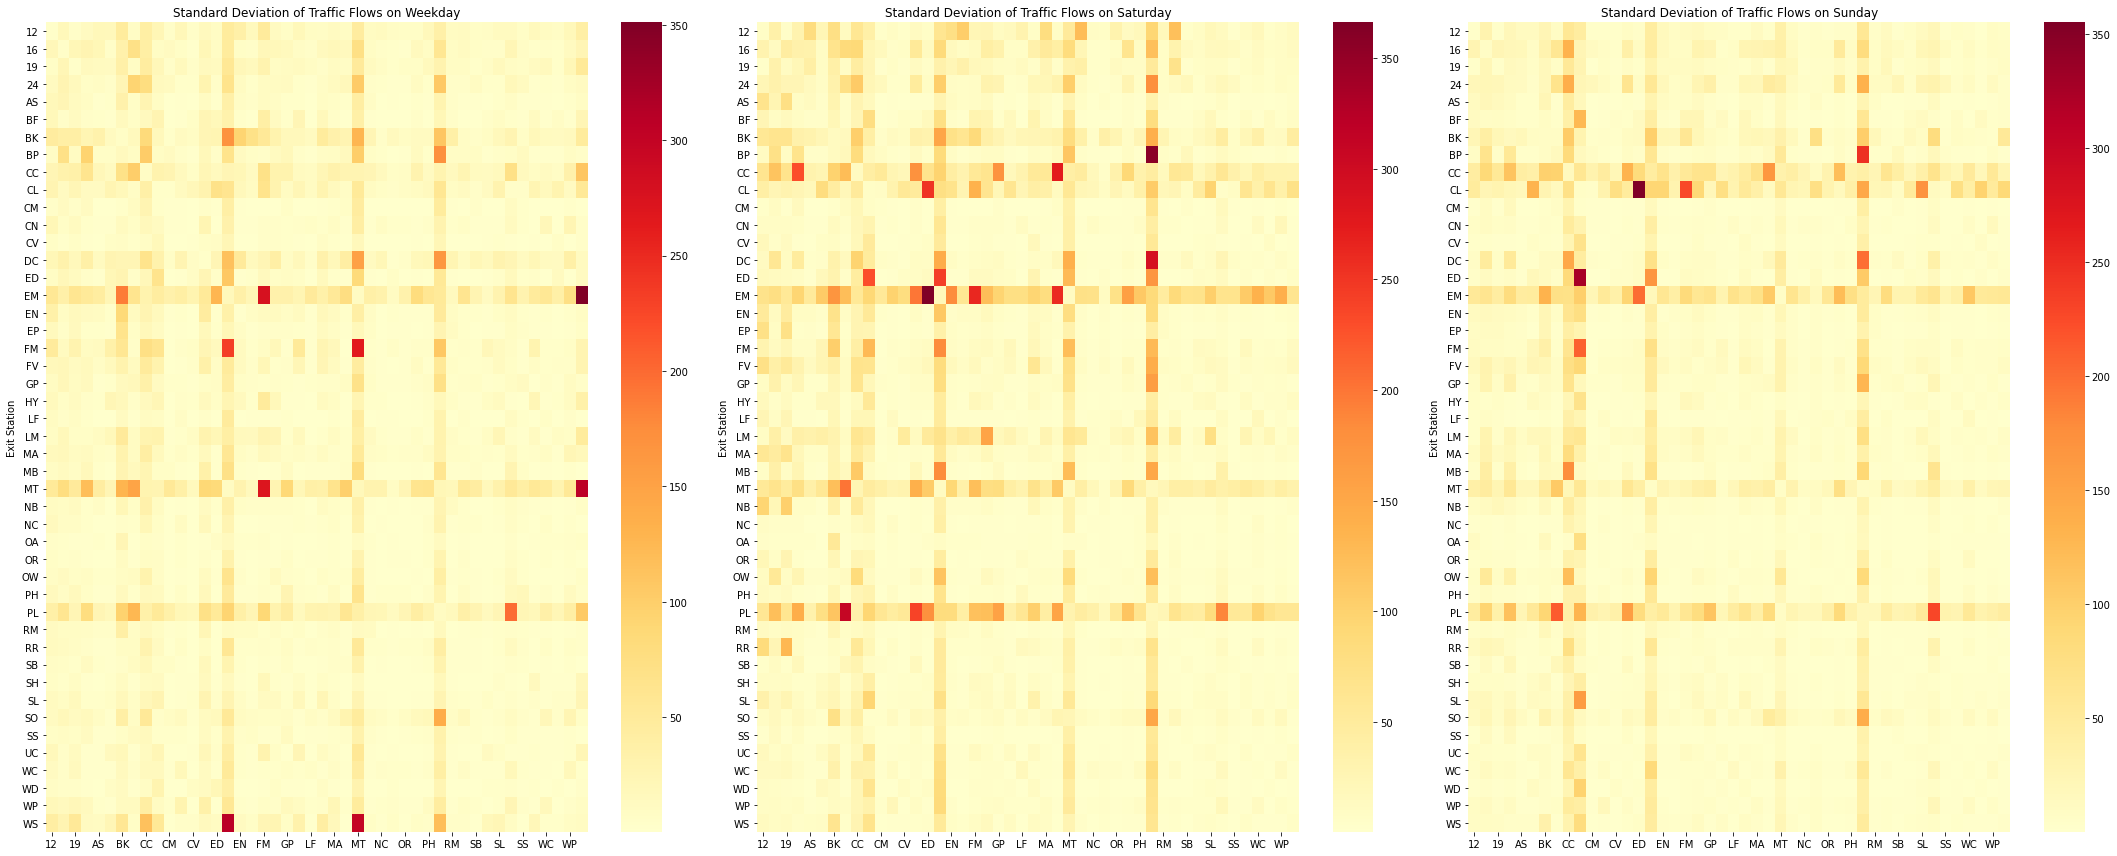

In [16]:
Image('./figures/Std_Weekdays_vs_Weekends.png')

To provide further support for our observations, we calculate the standard deviation of the average daily traffic on weekdays and weekends from 2016 to 2018. This calculation will provide additional insights into the level of variability in ridership patterns during different days of the week.

    Weekday : 13383.409247592897
    Saturday : 18888.234318365146
    Sunday : 16897.5775013141

As expected, we draw the same conclusion as the station-wise graph, which is that Saturday's traffic flow is the most fluctant, and Weekday's traffic is the least. The difference in the standard deviation of traffic between weekdays and weekends can be attributed to several factors related to human behavior and routines.

- Consistent Work/School Schedule: Weekdays typically follow a structured work or school schedule for a significant portion of the population. Commuters tend to have regular routines and predictable travel patterns, resulting in more consistent traffic patterns. This regularity leads to less variability in the number of commuters and subsequently a smaller standard deviation.

- Reduced Commuter Variety: On weekends, the composition of commuters may vary significantly compared to weekdays. Weekends often see a mix of different activities such as leisure, recreation, and personal errands. This variety in commuter types and purposes can lead to a wider range of traffic patterns, resulting in a larger standard deviation.

- Time Flexibility: On weekends, people often have more flexibility in choosing their travel times. This flexibility can lead to a more dispersed distribution of commuter traffic throughout the day, resulting in a higher standard deviation compared to weekdays when rush hours and specific work/school schedules dominate the traffic patterns.

- Reduced Rush Hour Effects: Weekdays usually have distinct rush hours when a significant number of commuters travel to and from work or school simultaneously. These peak hours can create a more concentrated and predictable traffic flow, leading to a smaller standard deviation. On weekends, the absence or less pronounced rush hour effects can contribute to a higher standard deviation.

Overall, the combination of regular work/school schedules, reduced commuter variety, predictable rush hours, and the more structured nature of weekdays contributes to a smaller standard deviation in traffic. Conversely, the increased flexibility, variety of activities, and reduced rush hour effects on weekends tend to result in a larger standard deviation in traffic patterns.

### 2. Which Stations have the most fluctant traffic?

Given the standard deviation of the station, the next interesting question is: Which stations have the highest or lowest variance? Is that related to a certain type of land use of the stations?

We sum up the traffic data from year 2015 to 2018, and based on the previous analysis, filter out only the weekend data. After calculating the standard devation based on stations, we found out the stations with the most the most fluctant traffic are all located at Downtown San Francisco with one exception(`CC`). Namely, these four stations:
- Civic Center (`CC`)
- Embarcadero (`EM`)
- Montgomery Street (`MT`)
- Powell Street(`PL`)

As we can see, all of these locations are located at the San Francisco CBD, which begs the question: Is there a correlation between the type of land use of a station and its level of fluctuation of traffic?

We choose four different categories of land use with the following stations:
- Commercial Usage, with the most representative region being the San Francisco CBD. This category contains four station:
    - Civic Center(`CC`)
    - Embarcadero(`EM`)
    - Montgomery Street(`MT`)
    - Powell Street(`PL`)
- Academic Usage, with the most representative region being those surronding Berkeley campus. This category contains two station:
    - Downtown Berkeley(`BK`)
- Mixed Usage, with Oakland as a representation since it has a nice mixture of residential and commercial areas. This category contains:
    - Ashby(`AS`)
    - MacArthur(`MA`)
    - 19th Street Oakland(`19`)
    - 12th Street / Oakland City Center(`12`)
    - West Oakland(`OW`)
- Transport Usage, with two station of international airport:
    - Oakland International Airport(`OA`)
    - San Francisco International Airport(`SO`)

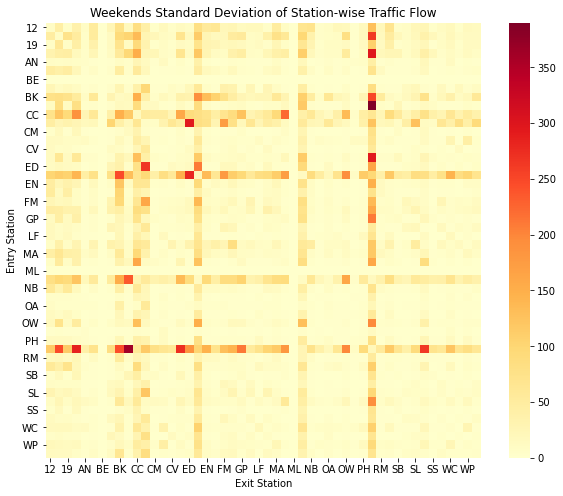

In [17]:
Image('./figures/Std_Sum_Weekend_Stationwise.png')

    Here is the ranking of standard deviation on weekends based on land types:
    We have a total of 48 stations
    | Station | Ranking | Standard Deviation |
    =============== Commerce ================
    |   CC    |    3    |    2424.176346     |
    |   EM    |    2    |    2830.647603     |
    |   MT    |    4    |    2122.867073     |
    |   PL    |    1    |    4387.185515     |
    ================ School =================
    |   BK    |    5    |    1978.032026     |
    ================== Mix ==================
    |   AS    |   23    |    563.657715      |
    |   MA    |   17    |    769.760560      |
    |   19    |   10    |    1036.354981     |
    |   12    |   11    |    1035.911162     |
    |   OW    |   13    |    841.088848      |
    =============== Transport ===============
    |   OA    |   41    |    280.599278      |
    |   SO    |   21    |    634.119151      |
    =========================================

Here we can see that station for Commerce land and used for commute to school have the highest standard deviation while station for Transport purposes have much lower standard deviation.

## Analysis of ridership of stations with different land use

Given the selected stations, the following section is to examine the ridership over the past five years (2018-2022). The aim of this study is to compare the ridership patterns before, during, and after the pandemic, with a focus on four specific locations with different land use: 1) San Francisco CBD (commercial land use), 2) Berkeley(academic land use), 3) Oakland(mixed land use), and 4) International Airports(transport land use).

### 1. San Francisco CBD (Commertial Land Use)

The pandemic led many companies to implement the "work from home" policy, allowing employees to work from anywhere instead of commuting to the office. This policy proved successful for some companies, and many continue to implement it. As a result, this study assumes that the number of people traveling to San Francisco CBD for work significantly decreased during and after the pandemic comparing to pre-COVID time. The plots below show that before the pandemic, the selected BART stations (Embarcadero, Montgomery Street, Powell Street, Civic Center) had 20,000 to 50,000 daily trips. However, although ridership has been increasing since 2020, late 2022 data shows only around 10,000 monthly trips. This indicates that although people may feel that things have returned to normal, the pandemic has altered their commuting patterns.

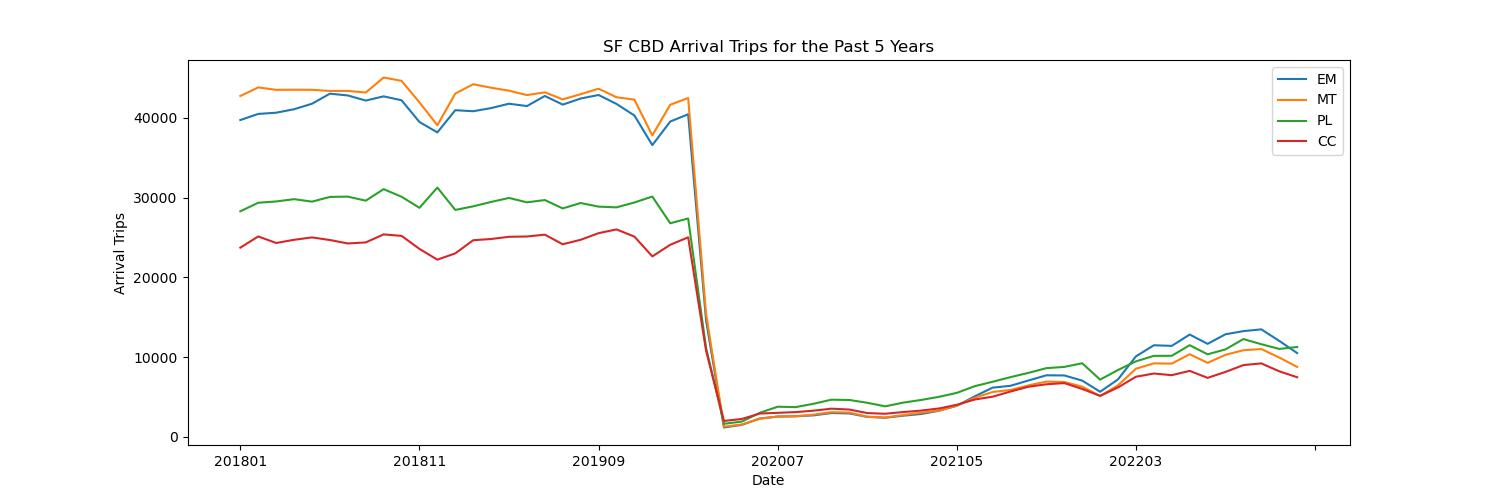

In [18]:
Image('figures/SF CBD Arrival Trip Count.jpg')

The above discussed the travel volumes of the stations, but it is not clear how much of a difference there is before and after the pandemic. To address this, we calculate the arrival trip ratio relative to the peak arrival trip volumes of the past 5 years.

It is evident that the number of trips is gradually increasing, but as of late 2022, less than 40% of the peak arrival trip volumes of the past 5 years are observed.

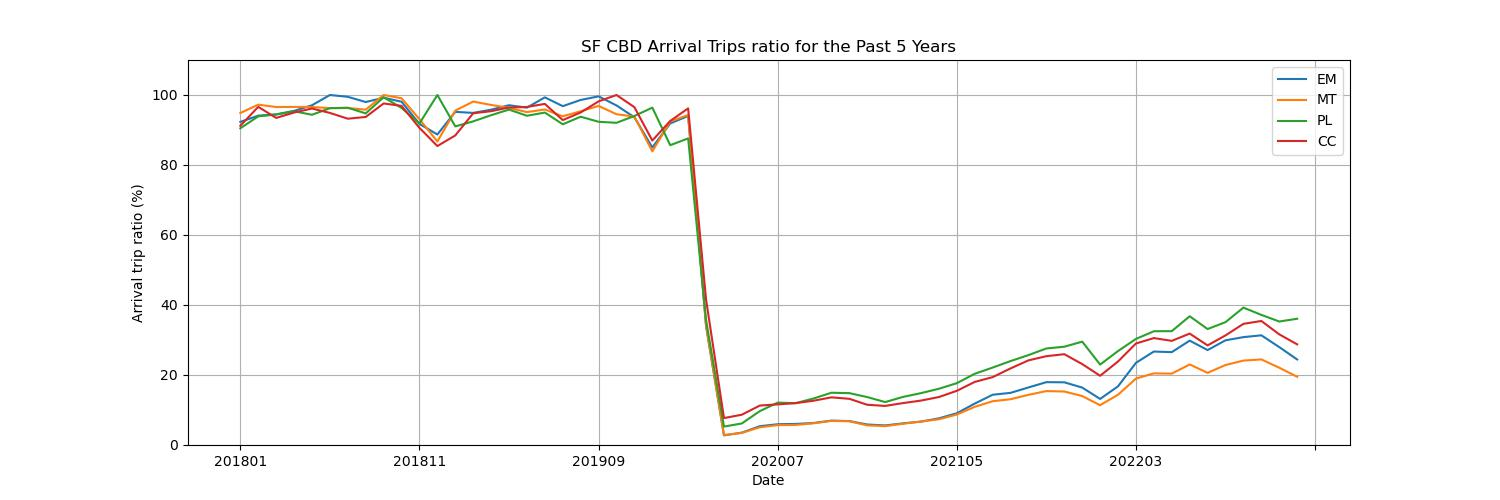

In [19]:
Image('figures/SF CBD Arrival Trip Ratio.jpg')

### 2. Berkeley (Academic Land Use)

It is assumed that the majority of BART passengers in Berkeley, particularly at Downtown Berkeley stations, are students studying at UC Berkeley. Due to the campus lockdown from 2020-2021, ridership during this period is expected to have been very low. With the reopening of the campus, it is expected that the number of trips would gradually increase back to pre-COVID levels. However, the graph below shows that although a growth trend is observed after the summer of 2021, which is when the campus reopened, the total number of trips is still far below the pre-COVID level.

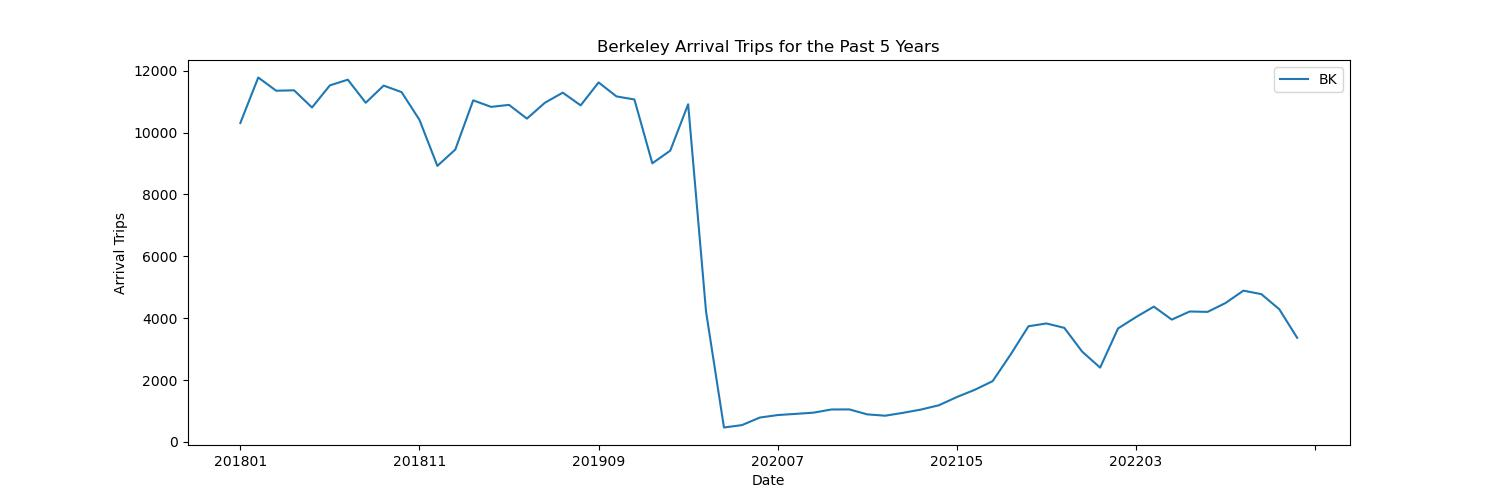

In [20]:
Image('figures/Berkeley Arrival Trip Count.jpg')

Next, looking at the stations in Berkeley, the pattern is similar to the one observed above. We were assuming that the ridership growth rate might be faster than the commercial area because students need to go back to campus. However, the ridership in Berkeley does not grow much faster comparing to the commercial areas. This might be because of the recording of the classes. After the pandemics, many classes starts to provide lecture recordings that student might not need to go to the campus but can finish the course wherever they can connect to the internet. As a result, the ridership is less comparing to pre-pandemic period. 

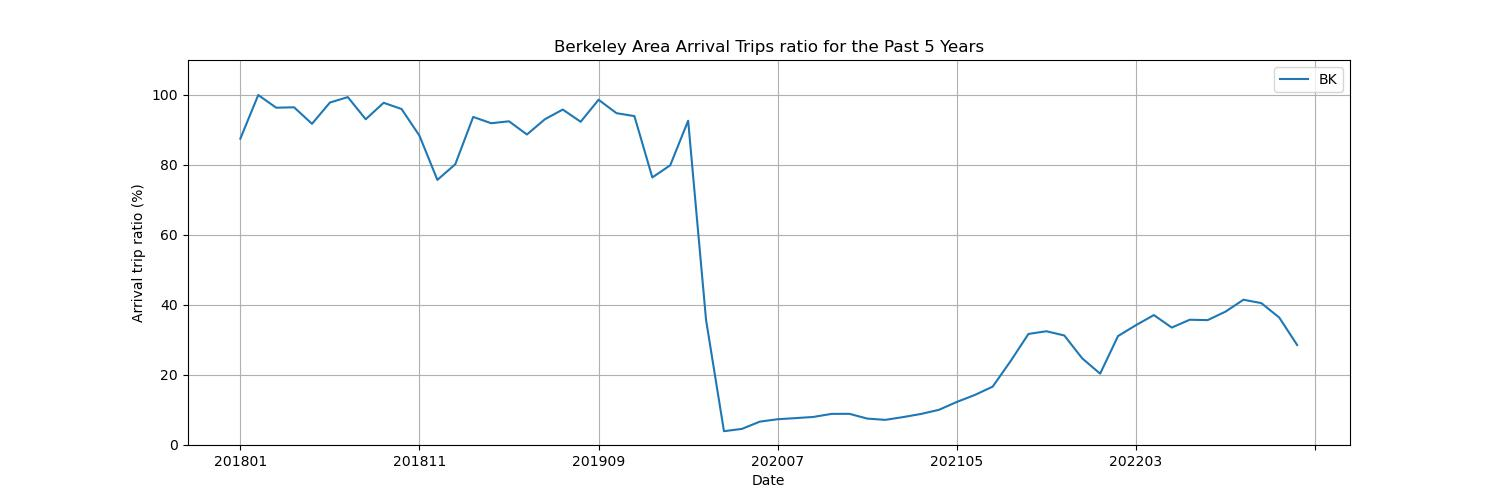

In [21]:
Image('figures/Berkeley Arrival Trip Ratio.jpg')

### 3. Oakland (Mixed Land Use)

Oakland is a major city in the East Bay area with a more complex land use pattern than San Francisco CBD and Berkeley. Unlike the other two locations, Oakland's land use is a mix of both business and residential areas. This study aims to investigate whether this mix-use land use pattern leads to different travel patterns. The graph below shows that despite the different land use, similar trends to the above plots are observed, indicating that the general travel pattern remains the same regardless of land use.

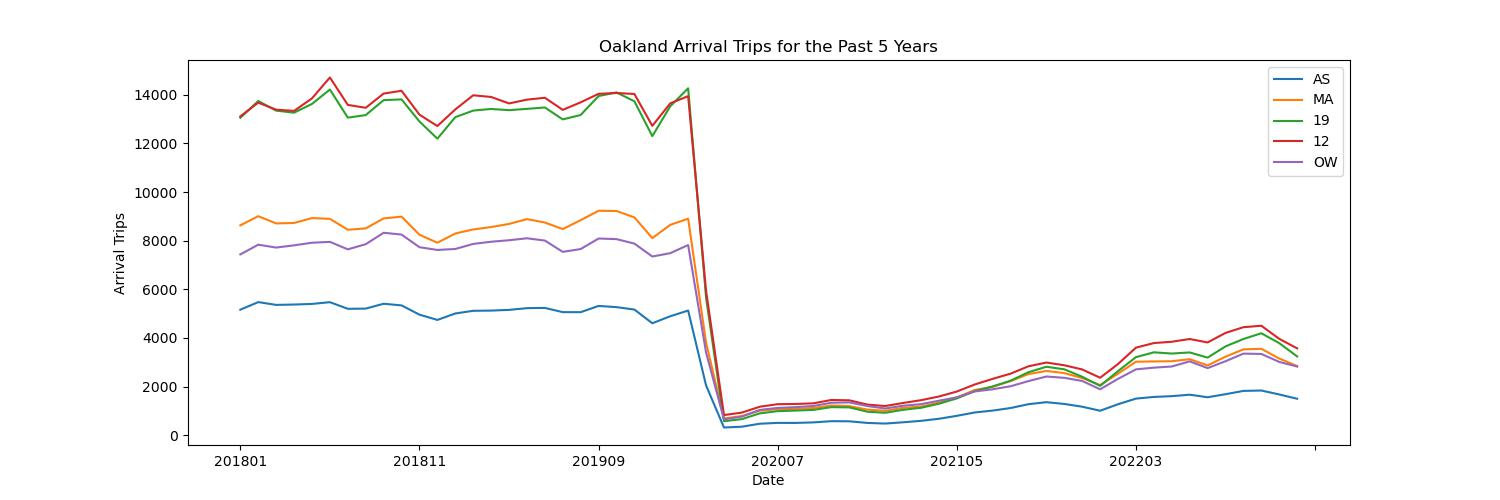

In [22]:
Image('figures/Oakland Arrival Trip Count.jpg')

Similar to the patterns shown in other stations, the ridership rate started to grow after the pandemic. However, the amount of the trips is still far less than pre-COVID level (about 40%). 

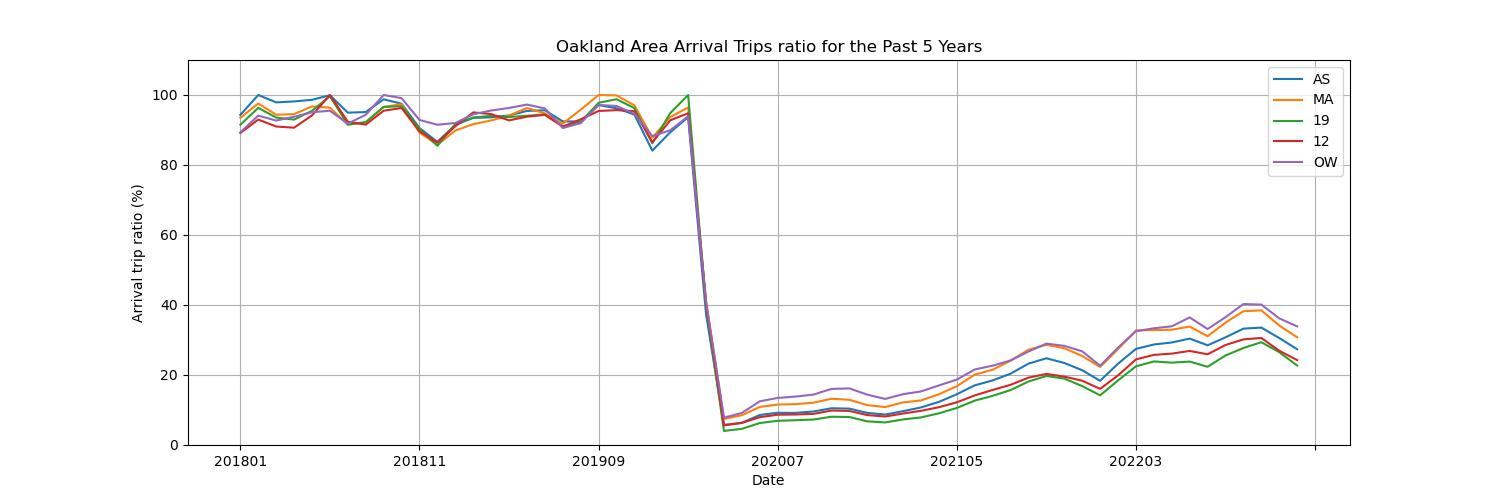

In [23]:
Image('figures/Oakland Arrival Trip Ratio.jpg')

### 4. Airports (Transport Land Use)

Lastly, this study discusses trips to the international airports (Oakland International Airport and San Francisco International Airport). Similar patterns to the previous locations are observed, but with a faster growth rate. This highlights the importance of public transit for international airports, as the majority of passengers are likely foreigners who rely heavily on public transit to reach their destinations.

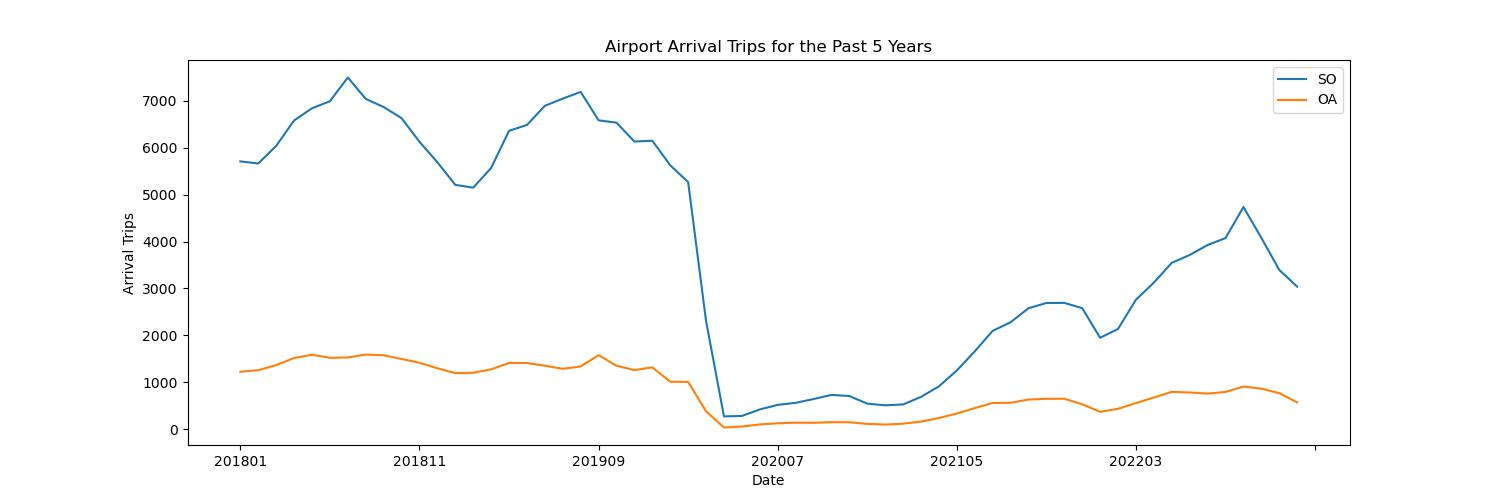

In [24]:
Image('figures/Airports Arrival Trip Count.jpg')

The stations at the airports show a faster growing pattern than the rest of the stations. This indicates the importance of the connection between public transits.

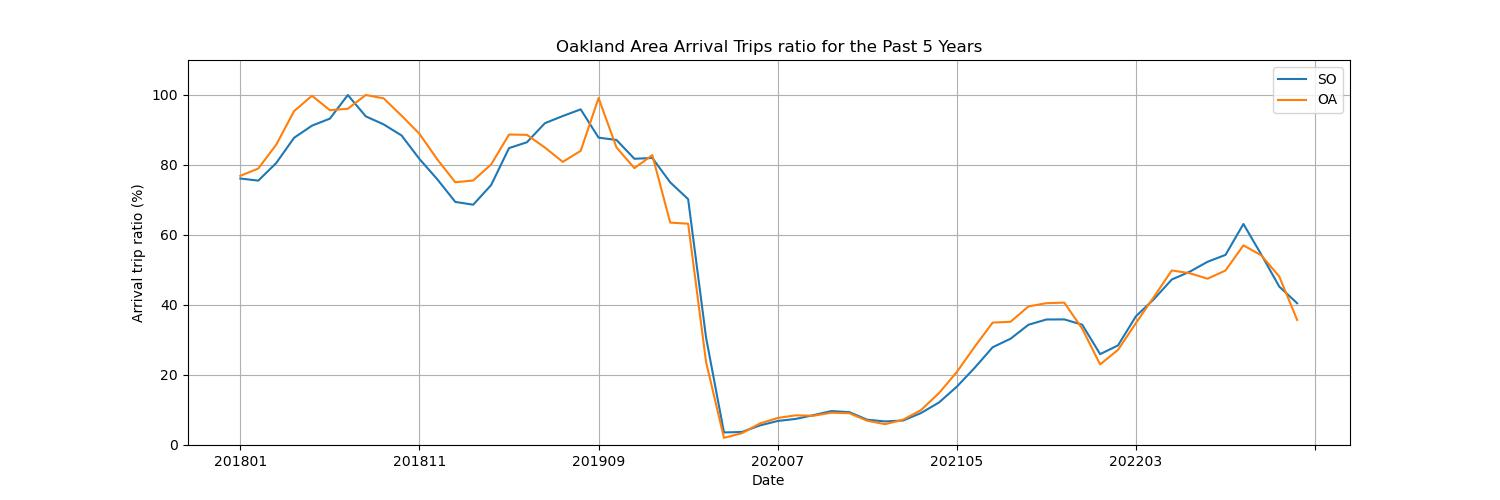

In [25]:
Image('figures/Airport Arrival Trip Ratio.jpg')

## Predicting Future Ridership Patterns After Covid-19 Using Pre-Covid-19 Data

The above analysis shows that except the stations at the airports, other stations shows a similar trend of the ridership before and after the pandemic. Hence, to narrow down the scope of the work, for this section of the analysis, we will focus only on analyzing the ridership from Downtown Berkeley station (entry station) to Embarcadero station (exit station) pre- and post-pandemic to infer the impact of Covid-19 on people's choice of transportation modes. The reason for selecting these two stations is that, firstly, students constitute the majority of Downtown Berkeley station riders. Because they typically don't own cars, the impact could be much more significant. Secondly, Embarcadero is one of the busiest stations according to BART's website (bart.gov). With the growing popularity of remote working and studying during the pandemic, it is highly likely that the ridership for these two stations has changed drastically. Hypothetically, it may take a long period of time for the ridership to recover back to pre-pandemic levels.

*pre-pandemic: before 2020, post-pandemic: after 2020

### Pre-Pandemic Ridership

To begin with the analysis, we first plot the ridership counts for the past 10 years (2010-2020). Based on the plots below, there appears to be an annual seasonality with the peak around summer and trough around the winter. In general, there is an increasing trend observed throughout 2010-2015, but it gradually declines afterwards. The variance of ridership over time has been steady, although the variances for the years 2014-2016 are larger than those of other years.

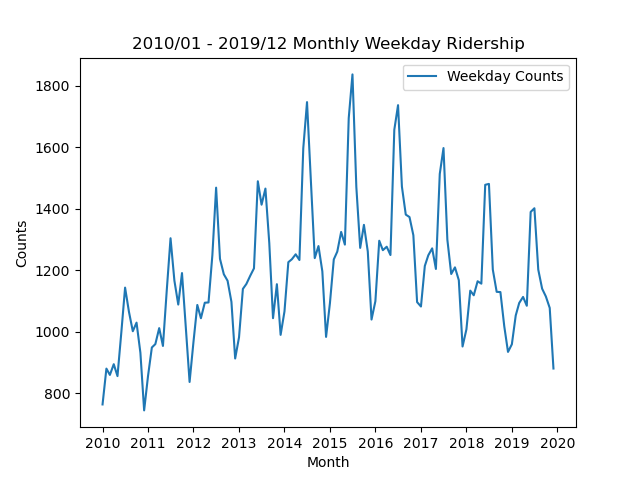

In [26]:
Image(filename="figures/Berkeley_Embarcadero_2010_2019_Ridership.png")

 To standardize the variance of the data, a Log Transformation has been applied, as shown in the following plot.

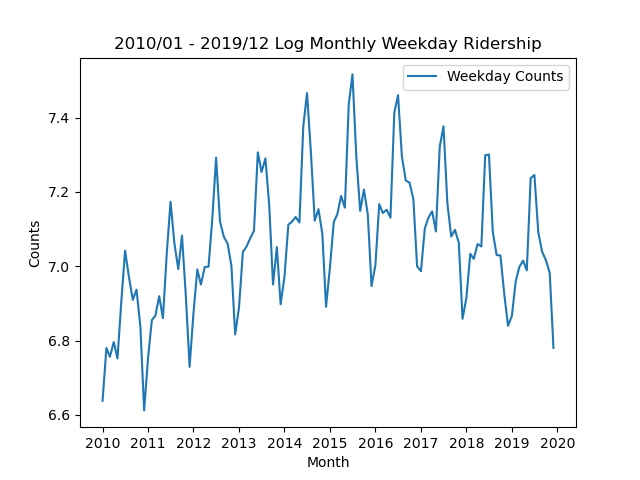

In [27]:
Image(filename="figures/Berkeley_Embarcadero_2010_2019_Log_Ridership.png")

After taking the first order difference, the data is non-stationary with a strong seasonality at the indies of multiples of 12. To minimize the effect of seasonality, another lag difference of 12 is taken. The resulting data gives a much better result in terms of stationarity. Moreover, the p-value of the adfuller test is below 0.05, allowing us to reject the null and conclude that the differenced data is stationary. The data set is then split into training and testing, and a parameter search is performed on the training set to determine the best arima model. 

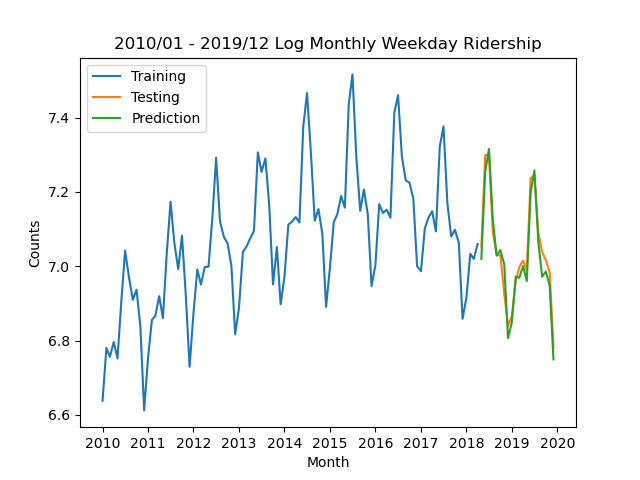

In [28]:
Image(filename="figures/Berkeley_Embarcadero_2010_2019_Modeling.png")

### Post-Pandemic Ridership

The extent of influence is calculated by computing the absolute difference between the ridership predicted by the pre-pandemic model and the actual ridership observed in 2021-2022. Since the output value of the pre-pandemic model is logged, the result must be exponentialized for comparison to be feasible.

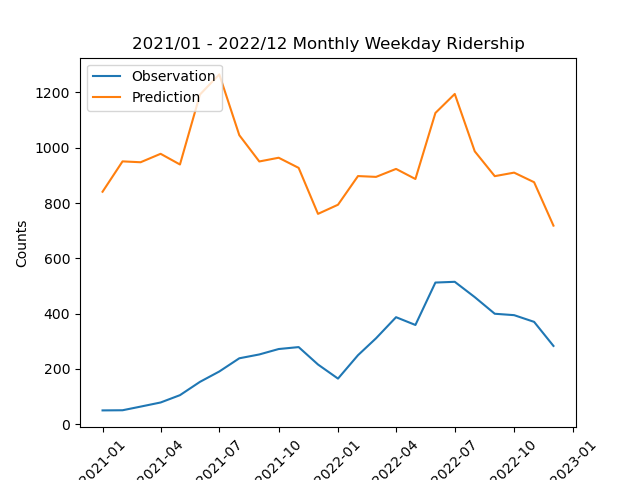

In [29]:
Image(filename="figures/Berkeley_Embarcadero_2021_2022_Prediction_Observation_Comparison.png")

The difference between the predicted and observed ridership is gradually decreasing, with only a 500-rider average gap expected at the end of 2022. Although the two ridership values will eventually intersect with each other, the current difference implies that Covid-19 has had a significant impact on people's choice of transportation modes. However, it is important to note that the model's training data shows a declining trend after 2015, which means the model could result in negative ridership in the future. The underlying factor that caused the drop remains unknown, but presumably it affected the model's accuracy.

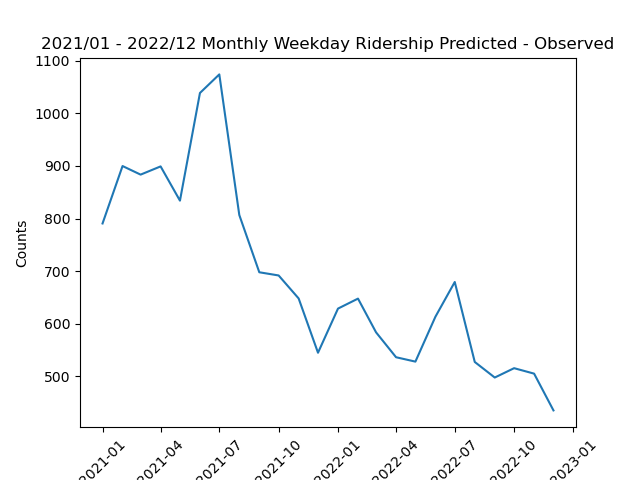

In [30]:
Image(filename="figures/Berkeley_Embarcadero_2021_2022_Prediction_Observation_Difference.png")

## Conclusion

The study begin by visualizing the data with the ridership decline rate for the selected stations. We observe a significant ridership drop across all stations. Next, standard deviation analysis is adopted to understand the fluctuation of the ridership for each of the stations. We find that the stations in commercial area (i.e., San Francisco CBD) usually have a higher standard deviation. On the contrary, the stations located in the airports show a relatively small standard deviation. According the standard deviation, we further cluster the stations into 4 groups (Commerce, School, Mix, Transportation).

The analysis of ridership of stations with different land use reveals that, compared to the pre-COVID period, the ridership at the majority of stations, regardless of land use, has only recovered to less than 40%. However, there is a notable exception for stations located at airports, where a higher percentage (around 60%) of the ridership has returned. This study highlights the significant changes in people's travel patterns due to various factors such as work-from-home policies or online lectures. However, it also underscores the ongoing demand for public transit connections, particularly at international airports, emphasizing the importance of efficient transportation links in serving travelers' needs.

Lastly, a machine learning model (ARIMA) is used to predict the ridership. The analysis shows that the model can accurately predict the ridership before the pandemic hit. However, the model fails to predict the behavior during and after the pandemic, since the model never see the data with a severe pandemic hit to the society. The error between the prediction and actual ridership is large after the pandemic, showing that the pandemic has significantly influence people's daily life.

## Contribution Statement

**Jiachen Li:** Created the notebook `Modeling_Post_Covid_Ridership_Using_Pre_Covid_Data.ipynb`. Added relevant data import functions to `project_tools/utils.py`, as well as function tests to `project_tools/test/test_utils.py`. Set up the JupyterBook, `environment.yml`, Makefile, and project_tools package. Contributed to `README.md` and proofread the main notebook.

**Noor Wahle:** Created the notebook `Mapping_Analysis.ipynb`. Added relevant mapping functions to `project_tools/utils.py`, as well as function tests to `project_tools/test/test_utils.py`. Integrated mapping results into `main.ipynb` and proofread narrative. Contributed to `README.md`, and created `LICENSE` and `.gitignore`. 

**Shih-hung Chiu:** 

**Jingya Zhao:** Created the notebook `Ridership_Standard_Deviation_Analysis.ipynb`. Added relevant data processing functions to `project_tools/utils.py`, as well as function tests to `project_tools/test/test_utils.py`. Integrated analysis of Standard Deviation, both station-wise and in general into `main.ipynb`. Further investigate the causes of higher standard deviation across time in `Ridership_Standard_Deviation_Analysis.ipynb`.